<br> **Soliz, Joseph
<br> Astr 630
<br> 2022/01/28**

## Astr 630 Homework 1

1. **Introduction to Gaia Data**. Gaia has changed what we consider “well-measured”
by giving us precise 3-D positions, motions, and photometry for a huge number of stars.
This exercise will encourage you to get familiar with using Gaia data.

**a)** Go to the Gaia archive (gea.esac.esa.int/archive/) for Early Data Release 3 (EDR3) and select stars within 7.5◦ of the center of the α Persei star cluster.  

In [1]:
import csv #not needed but was placed in just in case
import numpy as np
data = np.genfromtxt('1643067283553O-result.csv', names=True, delimiter=',') #csv data with header columns
data

array([(4.68374400e+17, 60.03210049, 54.36634428, 3.54360397, 1.6618319 ,  0.72634196,  -2.37744463, 20.792524, 1.5054798, nan, nan),
       (4.68375465e+17, 59.96160024, 54.40314937, 6.82350711, 1.101364  , 33.00179506, -14.17544983, 20.089455, 2.8267155, nan, nan),
       (4.40728967e+17, 43.11600081, 51.9256503 , 3.86054307, 1.684711  ,  2.77063522,  -7.05948518, 20.780428, 1.6574402, nan, nan),
       ...,
       (2.51506555e+17, 57.21880991, 51.60824009, 4.7627726 , 0.4576637 , -2.95149182,   5.80489404, 19.687294, 3.309309 , nan, nan),
       (2.51506619e+17, 57.2112648 , 51.61974049, 2.28863612, 0.27639657, -1.28293887, -20.30245982, 19.187777, 2.9460258, nan, nan),
       (2.51506658e+17, 57.22373699, 51.62801102, 3.21271208, 1.578077  , -0.98927335,  -4.81627875, 20.793772, 2.2177258, nan, nan)],
      dtype=[('source_id', '<f8'), ('ra', '<f8'), ('dec', '<f8'), ('parallax', '<f8'), ('parallax_error', '<f8'), ('pmra', '<f8'), ('pmdec', '<f8'), ('phot_g_mean_mag', '<f8'), ('bp_r

RA and Dec in degrees (deg). Parallax coordinates in milli-arcseconds (mas). Photometery (G and BP-RP) in magnitude (mag).


b) Produce a Python notebook or program to read in your star file and create some
diagnostic plots to help identify cluster members:
* Sky positions (RA vs DEC)
* 2-D projected position (using distance and DEC to project onto a plane perpendicular to the ecliptic)
* Proper motion vector points (μα vs μδ )
* Color-magnitude diagram G versus color GBP − GRP .

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 10)

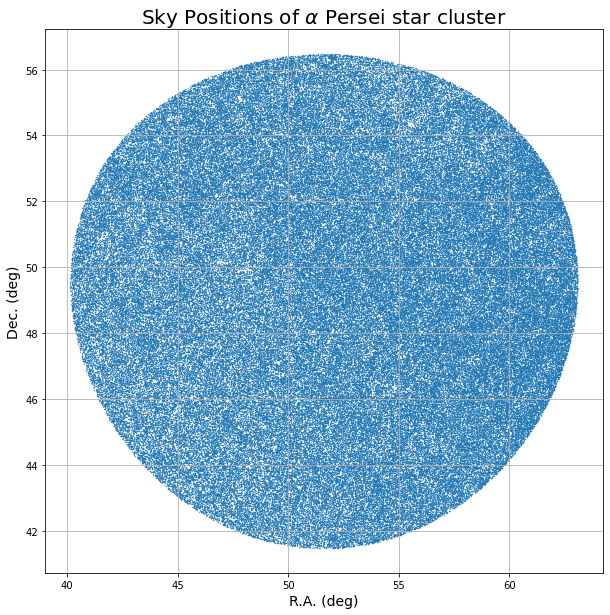

In [26]:
#RA vs Dec plot
plt.scatter(data['ra'],data['dec'], s=0.1)
plt.title(r'Sky Positions of $\alpha$ Persei star cluster', fontsize=20)
plt.xlabel('R.A. (deg)', fontsize=14)
plt.ylabel('Dec. (deg)', fontsize=14)
plt.grid();

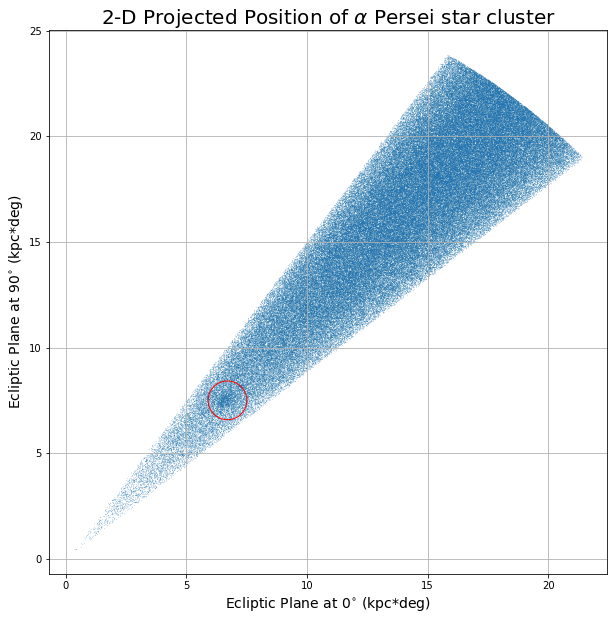

In [31]:
#2-D Projected Postion

dist = 1/(data['parallax']*0.001) #distance (parsecs) = 1/parallax. 
#Since the initial parallax is in milli-arcsec, converted the data from 0.001 arcsec

rad = data['dec']*(2*np.pi/360) #numpy does trig functions in radians. Convert degrees by 2pi/360 degrees

xdeg = np.rad2deg(np.cos(rad)) #used rad2deg to have the radians back into degrees
ydeg = np.rad2deg(np.sin(rad))

x1 = dist*(xdeg) #using trigonometery we have x = distance*cos(distance)
y1 = dist*(ydeg) #y = distance*sin(distance)


plt.scatter(x1/1000, y1/1000, s = 0.005) #since the parsecs are large I reduce down to kiloparsecs
plt.title(r'2-D Projected Position of $\alpha$ Persei star cluster', fontsize=20)
plt.scatter(6.7, 7.5, s=1500, facecolors='none', edgecolors='r') #circle for possible location of star cluster
plt.ylabel(r'Ecliptic Plane at 90$^{\circ}$ (kpc*deg)', fontsize=14)
plt.xlabel(r'Ecliptic Plane at 0$^{\circ}$ (kpc*deg)', fontsize=14)
#plt.legend()
plt.grid();

The cirlce provided in the 2-D projected positions is were we assume the $\alpha$ Persei Cluster is located. Around 7~8 kiloparsecs it appears there's a small concentration of stars in the scattered cone. 

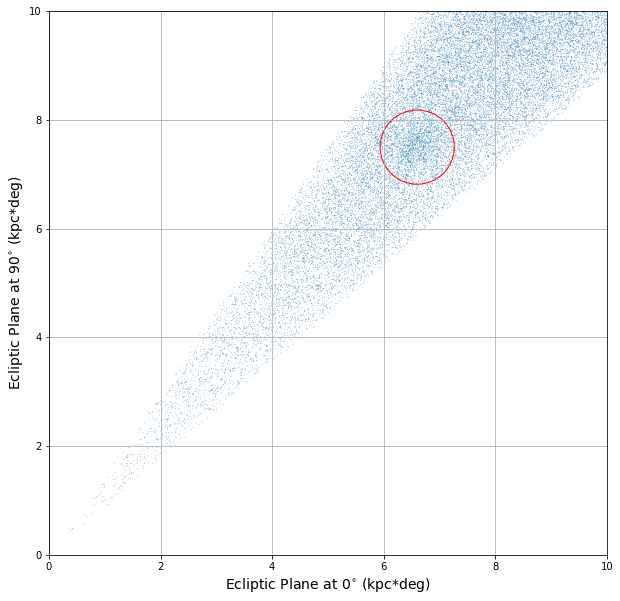

In [5]:
#Zoom in 2-D Projection
plt.scatter(x1/1000, y1/1000, s = 0.01)
plt.scatter(6.600, 7.500, s=5500, facecolors='none', edgecolors='r')
plt.ylabel('Ecliptic Plane at 90$^{\circ}$ (kpc*deg)', fontsize=14)
plt.xlabel('Ecliptic Plane at 0$^{\circ}$ (kpc*deg)', fontsize=14)
plt.xlim(0,10.000)
plt.ylim(0,10.000)
plt.grid();

A zoom-in about 10 kiloparsec does appear to show the cluster more, but not as visible.

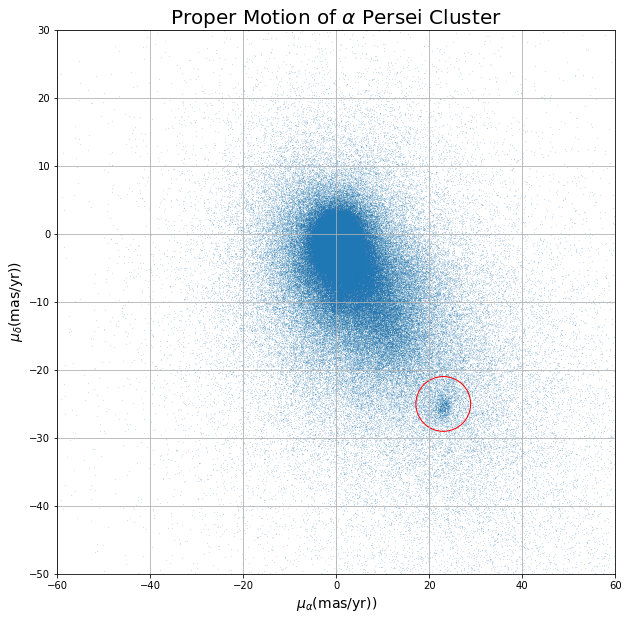

In [41]:
# Proper motion vector points
#zoom in to see the cluster better
plt.scatter(data['pmra'],data['pmdec'], s=0.005)
plt.xlim(-60, 60)
plt.ylim(-50, 30)
plt.scatter(23, -25, s=3000, facecolors='none', edgecolors='r')#circle of star cluster location
plt.title(r'Proper Motion of $\alpha$ Persei Cluster', fontsize=20)
plt.xlabel(r'$\mu_{\alpha}$(mas/yr))', fontsize=14)
plt.ylabel(r'$\mu_{\delta}$(mas/yr))', fontsize=14)
plt.grid();

The proper motions of all the stars from the data file reveal the star cluster clearer. Even though the plot had to be zoomed in more with a range $-60 < \mu_{\alpha} < 60$ and $-50 < \mu_{\delta} < 30$ in milliarcsec/year, two blobs appear. The larger blob are likely all the background stars with the 7.5$^{\circ}$ area. The smaller blob would indicate the star cluster since they there proper motion is concerntrated and more independent to the other stars. Learning the proper motions could be the best method to detect star clusters. 

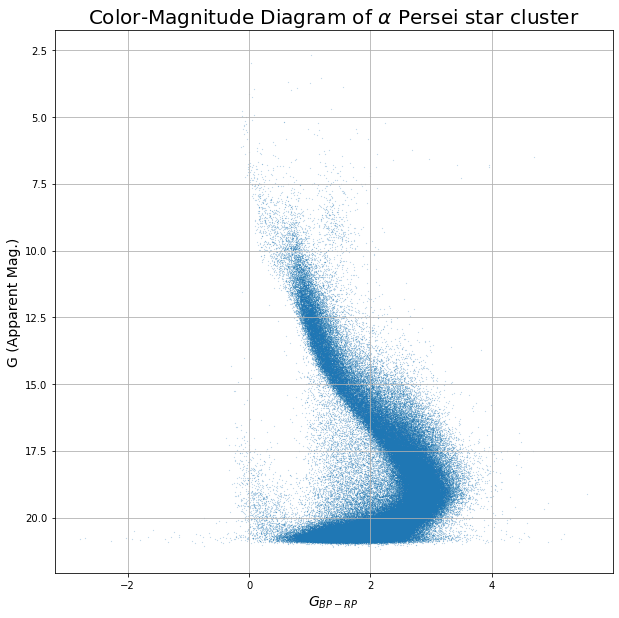

In [42]:
#Color-Magnitude
plt.scatter(data['bp_rp'],data['phot_g_mean_mag'], s=0.01)
plt.title(r'Color-Magnitude Diagram of $\alpha$ Persei star cluster', fontsize=20)
plt.ylabel('G (Apparent Mag.)', fontsize=14) #Convert this to absolute
plt.gca().invert_yaxis()
plt.xlabel(r'$G_{BP-RP}$', fontsize=14)
plt.grid();

The stars appear to be a have a higher color at a low apparent magnitude and slightly decrease as the apparent magnitude in G-band increases. This is explored further in part (d).

c) Cut down to the stars within the cluster from the data.

To check if the data is corrected, I used a function created from Astr 680 where I can get information from SIMBAD on $\alpha$ Persei cluster.

In [9]:
from astroquery.simbad import Simbad
import astropy.units as u
from astropy.coordinates import SkyCoord, FK5
from astropy.time import Time
from astropy.io import fits
import os
from astropy.coordinates import get_sun

def get_target_info(name):
    """
    return a dictionary with information from Simbad for the given target name

    `name` is the target name (string)
    """
    
    # prepare a custom Simbad query
    customSimbad = Simbad()
    
    # the "pmra" and "pmdec" fields are not returned by default...add these
    customSimbad.add_votable_fields('pmra', 'pmdec')
    
    # get the target info from Simbad
    table = customSimbad.query_object(name)
    
    # just use the first row of the table
    row = table[0] #gets the first row
    
    # convert the RA and DEC columns to decimal degrees
    pos = SkyCoord(table['RA'][0], table['DEC'][0], frame=FK5, unit=(u.hourangle,u.deg))
    ura = pos.ra.deg
    udec = pos.dec.deg
    
    # convert the epoch of these coordinates to an astropy Time object for later use
    epoch = Time('J2000') # hint: what is Simbad's default epoch?
        #Idea is to use a consistent epoch. Look up Simbad's default epoch. Try looking at the tutorials.
   
    # initalize the output dictionary
    tinfo = {}
    
    # fill the dictionary with the target's data 
    # (name, R.A. and Dec. in decimal degrees, epoch, proper motions in R.A. and Dec.)
    tinfo.update({'name':name,'ra': ura, 'dec': udec,'epoch': epoch, 'pmra': row['PMRA'],'pmdec': row['PMDEC']})
    
    #other method to get pmra, pmdec: 'pmra': float(table['PMRA']),'pmdec': float(table['PMDEC'])
    
    # return the dictionary
    return tinfo

In [10]:
tinfo = get_target_info('Alpha Per Cluster ')
tinfo

{'name': 'Alpha Per Cluster ',
 'ra': 51.61666666666666,
 'dec': 48.975,
 'epoch': <Time object: scale='tt' format='jyear_str' value=J2000.000>,
 'pmra': 22.929,
 'pmdec': -25.556}

Confirmed information from SIMBAD: http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NAME%20Alpha%20Per%20Cluster. The previous plots with the circle from part a) would indicate these are likely area where the star candidates of the star cluster are located. 

To search for the star candidates, a truth array is made based on the assumed area where the star cluster is located.
* $20.0 < \mu_{\alpha} < 26.0$ 
* $-22.0 < \mu_{\delta} < -28.0$

In [43]:
b = np.where((data['pmra'] > 20.0) & (data['pmra'] < 26.0) & (data['pmdec'] < -22.0) & (data['pmdec'] > -28.0), True, False)
data['pmra'][b]

array([24.22579071, 23.2984116 , 20.44906317, ..., 20.4086245 ,
       25.8766527 , 25.65446752])

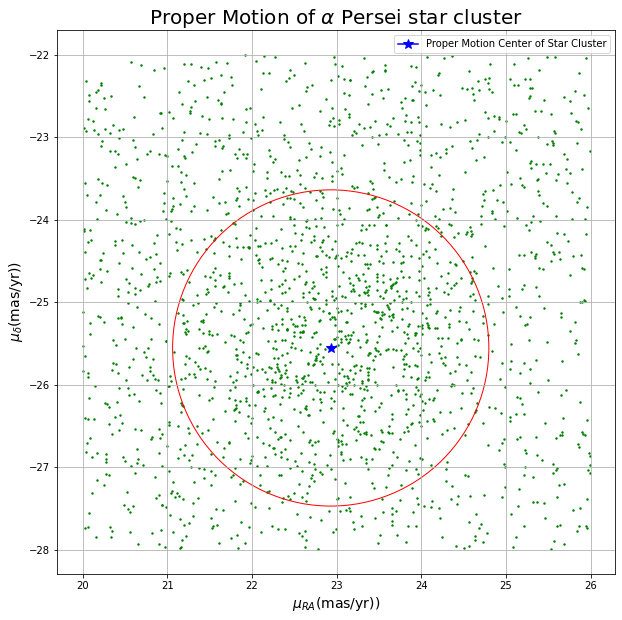

In [54]:
plt.scatter(data['pmra'][b],data['pmdec'][b], s=2, c='g')
plt.plot(22.929,-25.556, marker='*', ms=10, color='blue', label='Proper Motion Center of Star Cluster')
plt.scatter(22.929,-25.556, s=1e5, facecolors='none', edgecolors='r')
plt.title(r'Proper Motion of $\alpha$ Persei star cluster', fontsize=20)
plt.xlabel(r'$\mu_{RA}$(mas/yr))', fontsize=14)
plt.ylabel(r'$\mu_{\delta}$(mas/yr))', fontsize=14)
plt.legend()
plt.grid();

Here it appears the cluster is more visible now as you can see the proper motion of the stars begin to concentrate more around the area where the blue star is located. The shape of the cluster would indicate that this is a less dense and open cluster.

According to SIMBAD, the parallax of $\alpha$ Persei Cluster is 5.718 [0.005] mas. Made an truth array based on a region around the parallax of 5.0 mas < parallax < 7.0 mas.

174.88632388947184


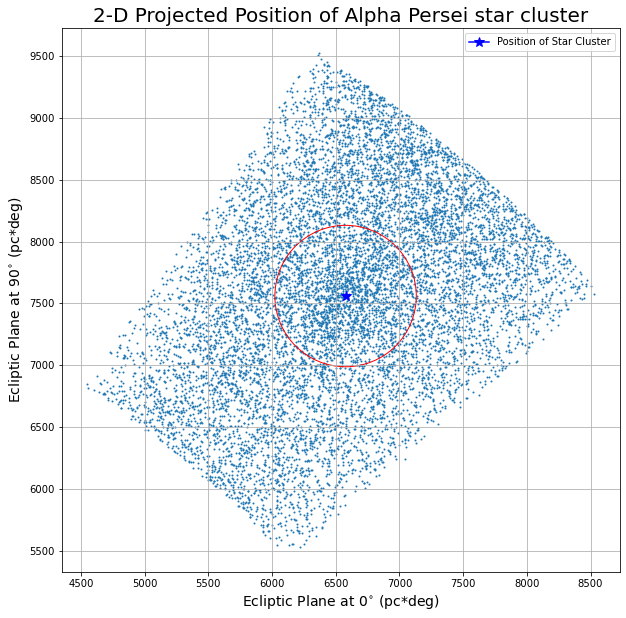

In [61]:
#for the region
p = np.where((data['parallax'] < 7.0) & (data['parallax'] > 5.0 ), True, False)
dist_p = 1/(data['parallax'][p]*0.001)

rad_p = data['dec'][p]*(2*np.pi/360)

xdeg_p = np.rad2deg(np.cos(rad_p))
ydeg_p = np.rad2deg(np.sin(rad_p))

x1_p = dist_p*(xdeg_p)
y1_p = dist_p*(ydeg_p)

#to prove where the star cluster is, did a calculation for a point of the center parallax of the cluster
dist_c = 1/(5.718*0.001) #units come out as parsec
print(dist_c)
rad_c = 48.975*(2*np.pi/360)
xdeg_c = np.rad2deg(np.cos(rad_c))
ydeg_c = np.rad2deg(np.sin(rad_c))
x1_c = dist_c*(xdeg_c)
y1_c = dist_c*(ydeg_c)

plt.scatter(x1_p, y1_p, s = 1)
plt.plot(x1_c, y1_c, marker='*', ms=10, color='blue', label='Position of Star Cluster')
plt.scatter(x1_c, y1_c, s=2e4, facecolors='none', edgecolors='r')
plt.title('2-D Projected Position of Alpha Persei star cluster', fontsize=20)
plt.ylabel('Ecliptic Plane at 90$^{\circ}$ (pc*deg)', fontsize=14)
plt.xlabel('Ecliptic Plane at 0$^{\circ}$ (pc*deg)', fontsize=14)
plt.legend()
plt.grid();

The distance calculated of the star cluster is at 174.886 parsecs. The region of the 2D projected position shows the star cluster remaining in an area 6000 to 7000 parsec$^{\circ}$ where most of the concentration is at the star point of the cluster. 

d) Plot a dereddened color-absolute magnitude diagram with just the selected cluster
members. (Use a reddening E(GBP − GRP ) = 0.151 and extinction AG = 0.272.) Also,
show on the diagram where spectral types A0, F0, G0, K0, and M0 are on the main
sequence using data from the table here:

https://www.pas.rochester.edu/~emamajek/EEM_dwarf_UBVIJHK_colors_Teff.txt

For (BP-RP, M_G):
- A0V (-0.037, 1.00)
- F0V (0.377, 2.51) 
- G0V (0.784, 4.325)
- K0V (0.983, 5.553)
- M0V (1.84, 8.16)

To solve the absolute magnitude with the extinction at G-magnitude:
$$d = 10 ^{(m-M+5+A_{G})/5}$$
$$M = m - 5(\log_{10}(d)-1) - A_{G}$$

In [18]:
#for absolute magnitude
dist = 1/(data['parallax'][b]*0.001) #units in parsec
#extinction AG = 0.272
M = data['phot_g_mean_mag'][b] - 5*(np.log10(dist)-1) - 0.272
M

array([10.04409882, 12.09327549,  4.16303748, ..., 12.8360185 ,
        5.71695878, 11.56691042])

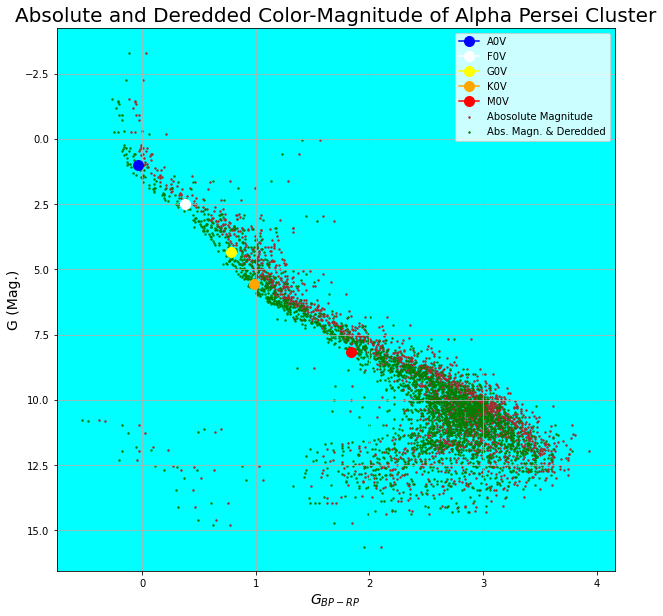

In [20]:
fig, ax = plt.subplots()
# reddening E(GBP − GRP ) = 0.151
ax.scatter(data['bp_rp'][b], M, s=2, c='brown', label='Abosolute Magnitude')
ax.scatter(data['bp_rp'][b] - 0.151,M, s=2, c='green', label='Abs. Magn. & Deredded')
ax.plot(-0.037,1.00, marker='.', ms=20, color='blue', label='A0V')
ax.plot(0.377, 2.51, marker='.', ms=20, color='white', label='F0V')
ax.plot(0.784, 4.325, marker='.', ms=20, color='yellow', label='G0V')
ax.plot(0.983, 5.55, marker='.', ms=20, color='orange', label='K0V')
ax.plot(1.84, 8.16, marker='.', ms=20, color='red', label='M0V')
ax.set_title('Absolute and Deredded Color-Magnitude of Alpha Persei Cluster', fontsize=20)
ax.set_ylabel('G (Mag.)', fontsize=14) #Convert this to absolute
fig.gca().invert_yaxis()
ax.set_xlabel('$G_{BP-RP}$', fontsize=14)
ax.set_facecolor("cyan")
ax.legend()
ax.grid();

#my final graph is absolute magnitude vs deredded 

The Color-Magnitude diagram shows greater improvement than the previous one from part (a). The star cluster canidates are considered based on the truth array from part (c) in regards to their proper motions. Yet due to the possiblitity of dimming and absorption of light from extinction, $A_{G}$ had to be considered. Five spectral types A0, F0, G0, K0, and M0 of main sequence stars were plotted. The results show that absolute magnitude seems to be above the main stars. A second plot is made where interstellar redding is considered and the deredded of the graph shows the plot move slightly to the left. Although, the stars on the deredded diagram now line up with the main stars. This does show that when observing stars and other objects in astronomy, interstellar redding and extinction have to be considered. The candidate stars also seem to be a majority of stars in the M-class region below M0V. With a thin line of stars along the other spectral types.